# 5章の章末問題解答例

### (1) 5.1.4項では、2部グラフとしてモニタと商品を利用しているが、モニタの代わりにレシートを、商品の代わりに細分類名を用いることも可能である。それぞれのメリット、デメリットについて考えなさい。

* モニタの代わりにレシートを用いる
    * メリット：一回の買い物単位での商品の共起を確認できるため、商品の利用形態における関係性についての知見が得られる。例えば、豆腐には生姜やポン酢を使うなど。
    * デメリット：モニタ単位での傾向が得られなくなるため、個人の商品の嗜好についての傾向が得られにくくなる。例えば、冬の食材と夏の食材の関係性などは得られなくなる。
* 商品の代わりに細分類名を用いる
    * メリット：商品の共通属性でまとめた商品分類間の関係性を分析できるため、より一般的商品の関係性についての知見が得られる。例えば、インスタントカレーとヨーグルトなど。細分類の「インスタントカレー」には100種類ほどの商品が、そして「ヨーグルト」には400種類近い商品が含まれており、商品単位で分析すると一般的な傾向が見つけづらくなる。
    * デメリット：ブランドや容量、商品特性などの関係性についての知見は得られなくなる。例えば、普通のヨーグルトと飲むヨーグルトの関係など。


### (2) 免罪符的購買以外にも、特保茶類が高カカオチョコレートと併買されるバイクラスタも注目された。顧客は高齢の女性に傾向が強かった。このバイクラスタからどのような購買シーンが考えられるであろうか？

健康を意識する年配者が動脈硬化や認知機能の改善に効果があるとの報告もあるカカオと特保茶を摂取しているのかもしれない。

### (3) 5.1.7項に示した施策の実施方法に関する改善点を考えよう。

* １月は正月休み開けを含む月のため、購入パターンが他の月に比べて特殊であることが考えられるので、他の月でも実験を実施すると違った結果が見られるかもしれない。
* 他店舗でも同様の実験を実施することで、年齢層や家族形態などの地域特性を考慮にいれた知見が得られるであろう。
* 非健康志向食品の売り場にも特保茶類の購入を促すPOPを示したり、特保茶類のクーポンを得られるようにすることで、より売り手側の意図が伝わりやすくなる。

### (4) 相関ルールを抽出する際の問題点がいくつか述べられていたが、それらはどういう点かもう一度考えてみよう。
相関ルールを抽出する際の問題点として、相関ルール抽出のための前処理と評価指標に関して注意が必要である。
前処理についての注意点は、データによっては、異なる商品IDにも関わらず同じ名称がつけられている場合があり、異なる商品群を混合して計算しないようにしなければならない。
そのために、商品分類をよく確認して，分類コードや分類名称の重複がなくユニークな単位で計算ができるように前処理を行う必要がある。
次に評価指標に関する注意点は、複数の評価指標を複合的に判断しなければならない点である。
相関ルールの評価指標は複数提案されているが、意味のある相関ルールを抽出するために用いられる唯一の指標は存在しない。
そのため，ルールの良し悪しを判断するには複数の指標を用いて複合的に考察する必要がある。



### (5) コード5.7で作成したデータフレームのRulesから、jaccardが相互に20位以内かつliftが相互20位以内のルールを選択した「m_rules3」を作成しよう。またそれをグラフで描画して興味深いルールを見つけてみよう。

In [26]:
import pandas as pd

# コード5.7によって作成されたout/AssociationRules.csvを利用
Rules = pd.read_csv('out/AssociationRules.csv')

# 「m_rules3」の作成
m_rules3 = Rules[(Rules['rankX-Y_jc'] <= 20)
                 & (Rules['rankY-X_jc'] <= 20)
                 & (Rules['rankX-Y_lift'] <= 20)
                 & (Rules['rankY-X_lift'] <= 20)]

# グラフ描画用のedgeファイルの作成
edge_data = m_rules3.iloc[:, [1, 3]]
edge_data.columns = ['Source', 'Target']
edge_data.to_csv('out/edge.csv', index=False)

#### グラフの描画はNetworkxを利用してみよう。詳細は6章のコード6.2を参照してください。また描画の際にパラメータを変更し見やすいネットワークにしてみよう。また、必要に応じてルール選択の閾値も変更してみよう。

379
927


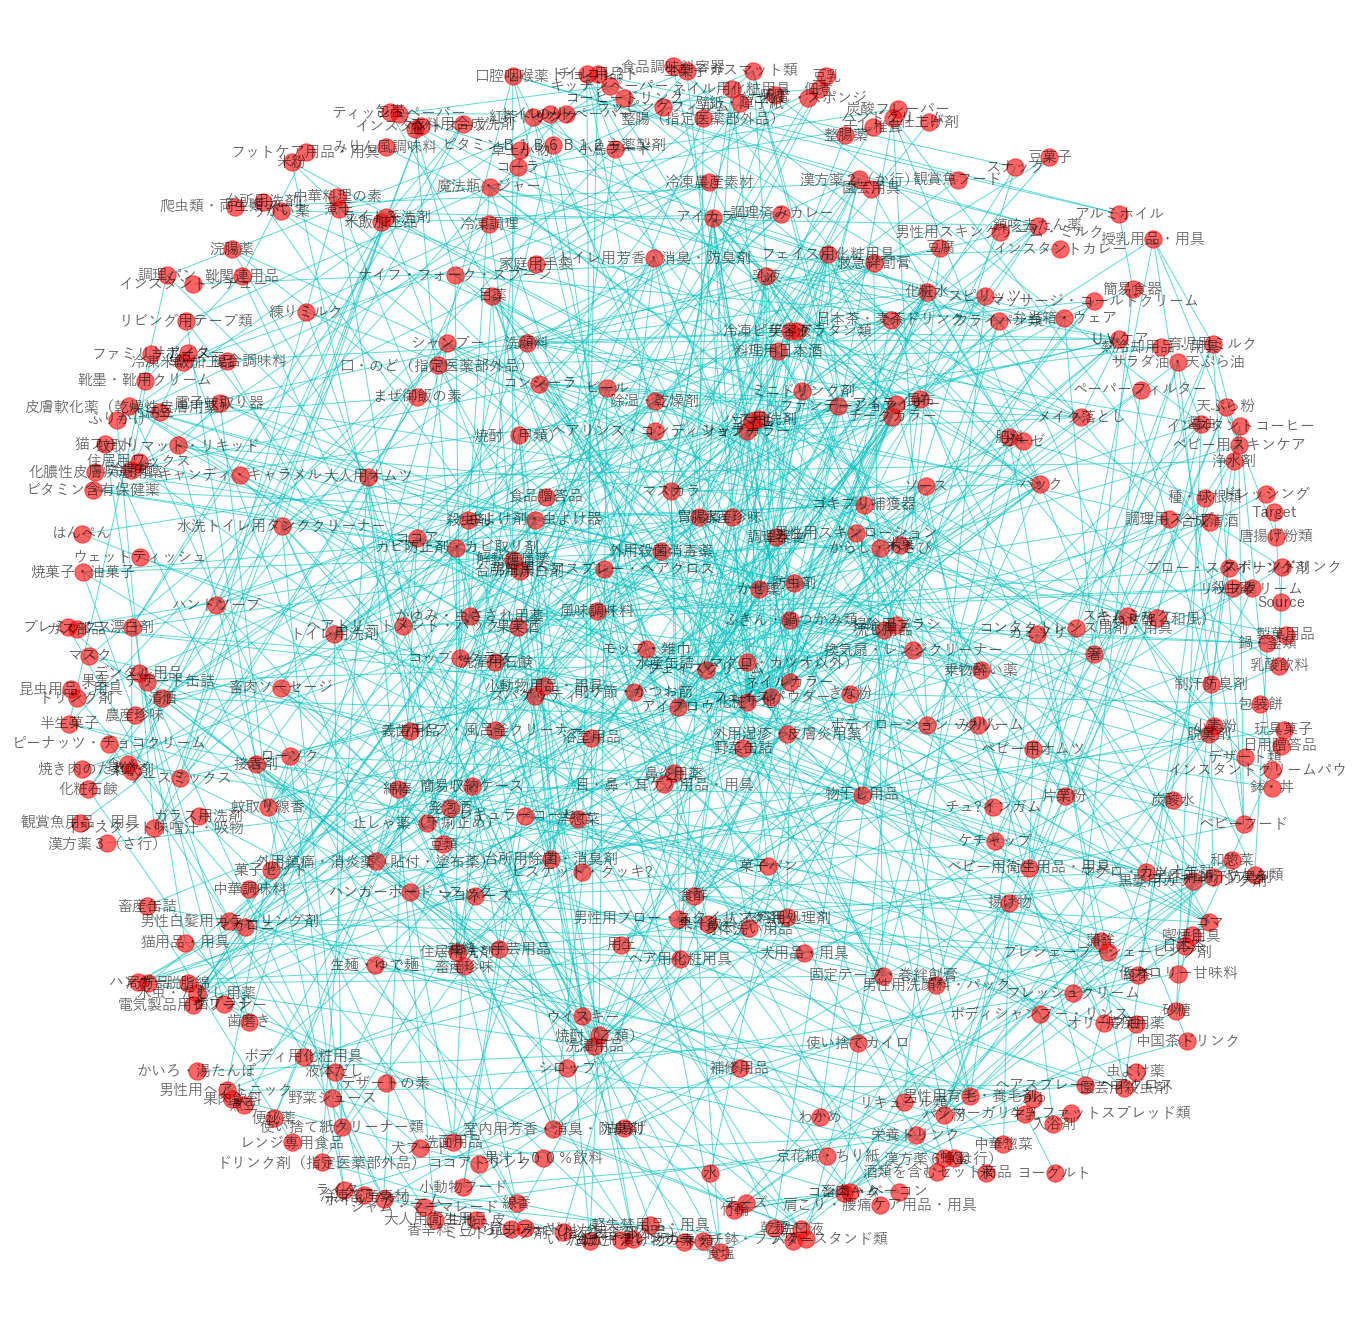

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import pathlib

# 環境に併せてフォントを選択
# Mac: YuGothic, Windows: MS Gothic Linux or Google Colab: IPAexGothic
font = 'YuGothic'
# font='IPAexGothic'
# font='MS Gothic


def graphDraw(file):

    # 拡張子を除くファイル名取得
    fname = (pathlib.Path(file)).stem
    # グラフの作成
    G = nx.Graph()

    # ファイルの読み込み
    G = nx.read_edgelist(file, delimiter=',', nodetype=str)
    print(nx.number_of_nodes(G))  # ノード数をカウントして出力
    print(nx.number_of_edges(G))  # エッジ数をカウントして出力

    # グラフ描画のレイアウトを決定。バネモデルでk=はノードの距離を決めるパラメーター
    pos = nx.spring_layout(G, k=0.8, seed=4)

    plt.figure(figsize=(24, 24))  # 図のサイズを決定 (単位はインチ)
    plt.axis('off')  # 軸は描画しない
    # ノードは赤色 (r)で透過率 (alpha=)60%、エッジはシアン (c)、文字サイズ 15インチ,フォントYuGothic(Mac),MS Gothic(Win),IPAexGothic(linux or Google Colab)
    nx.draw_networkx(G, pos, node_color='r', alpha=0.6,
                     edge_color='c', font_size=15, font_family=font)
    plt.savefig('out/%s.png' % (fname))


graphDraw('out/edge.csv')

### (6) 価格弾力性がプラスになったときには、どのような解釈ができるか考えてみよう。 価格変更後から価格変更前の差分を前提にしていることに注意されたい。

回答例：価格弾力性がプラスになる場合は、価格を値下げしたときに、販売量が減少する場合と、価格を値上げしたときに、販売量が増加する場合である。
したがって、値下げ時に価格弾力性がプラスになっている場合は注意が必要で、値引きの効果が得られていないことになる。
一方で、値上げ時の価格弾力性がプラスにっている場合は、その商品が適正価格よりも安く販売されていた可能性もあるが、この関係が今後も継続されるを引き続き観察すべきである。

### (7) ヨーグルトの代わりにmilk.csvを利用して牛乳を対象に価格弾力性を計算し価格変更の改善が必要な商品を発見しよう。

In [28]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('in/milk.csv')
# display(df.head())

# 単価の頻度が一番多い価格を通常価格とする
ds = df[['売上日', '商品名', '単価']]
ds = ds[~ds.duplicated()]

# groupbyを使う方法
ds = ds.groupby(['商品名', '単価']).size()
regPrice = ds.sort_values(ascending=False).groupby('商品名').head(1)
regPrice = regPrice.reset_index('単価')
regPrice.columns = ['通常価格', '頻度']
# display(regPrice)

# 日別の販売価格（同一日に複数の価格設定があれば数量合計が最大の価格を利用する)
qtty = df.groupby(['売上日', '商品名', '単価'])[['売上数量']].sum()
dailyPrice = qtty.loc[qtty.groupby(['売上日', '商品名'])['売上数量'].idxmax()]
# display(dailyPrice)

# 通常売価、特売、値上げを表す「価格設定」項目作成
dat = dailyPrice.join(regPrice)
dat = dat.reset_index().rename(columns={'単価': '販売価格', '売上数量': '販売数量'})
dat.loc[dat['通常価格'] < dat['販売価格'], '価格設定'] = "値上げ"
dat.loc[dat['通常価格'] > dat['販売価格'], '価格設定'] = "特売"
dat.loc[dat['通常価格'] == dat['販売価格'], '価格設定'] = "通常売価"
# display(dat)

# 通常売価のときの平均数量を計算
avgNum = dat[dat['価格設定'] == '通常売価'].groupby(
    ['商品名'], as_index=False)['販売数量'].mean()
avgNum = avgNum.rename(columns={'販売数量': '通常数量'})
rsl = dat.merge(avgNum, on='商品名')
# display(rsl.head())

# 通常価格以外の価格について価格弾力性を計算する
df = rsl[rsl['価格設定'] != '通常売価'].copy()

# 弾力性の価格変化率として利用(midpoint methodを利用)
df['価格変化率'] = (df['販売価格']-df['通常価格'])/((df['販売価格']+df['通常価格'])/2)
df['数量変化率'] = (df['販売数量']-df['通常数量'])/((df['販売数量']+df['通常数量'])/2)
df['価格弾力性'] = df['数量変化率']/df['価格変化率']
# display(df)

# 価格弾力性の平均値
avgEl = df.groupby(["商品名", "価格設定"], as_index=False)["価格弾力性"].mean()
avgEl

,商品名,価格設定,価格弾力性
0,M1,特売,-2.615323
1,M10,特売,-1.601371
2,M2,特売,-0.178119
3,M4,特売,-1.722603
4,M5,特売,-1.739157
5,M6,特売,-6.854444
6,M7,値上げ,-6.354592
7,M7,特売,-3.802094
8,M8,特売,-0.306741
9,M9,特売,0.419444


In [29]:
df = pd.read_csv('in/datQpr.csv')
df.sort_values(['モニタ', '日付', '購入先区分送信ID'])

,モニタ,日付,購入先区分送信ID,店舗,業態,商品,購入数量,単価,金額,都道府県,...,小学生有無,中高生有無,大人有無,老人有無,曜日,大分類名,中分類名,小分類名,細分類名,業態名
258,00J,20130606,NaN,2,2,y,1,135.0,135.0,0,...,0,0,1,0,木,食品,飲料・酒類,清涼飲料,コーラ,コンビニエンスストア
317,00J,20130606,NaN,2,2,9t3,1,258.0,258.0,0,...,0,0,1,0,木,食品,加工食品,調理品,中華料理の素,コンビニエンスストア
926,00J,20130606,NaN,2,2,0h,1,135.0,135.0,0,...,0,0,1,0,木,食品,飲料・酒類,清涼飲料,コーラ,コンビニエンスストア
99,00J,20130607,9KZD,2,2,0gQ,1,125.0,125.0,0,...,0,0,1,0,金,食品,飲料・酒類,清涼飲料,炭酸フレーバー,コンビニエンスストア
204,00J,20130607,9KZD,2,2,11E,3,128.0,384.0,0,...,0,0,1,0,金,食品,菓子類,菓子,スナック,コンビニエンスストア
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226297,zA,20140215,NaN,7,2,0AG,1,130.0,130.0,0,...,0,0,1,1,土,食品,加工食品,パン・シリアル類,菓子パン,コンビニエンスストア
226300,zA,20140228,NaN,7,2,07W,1,105.0,105.0,0,...,0,0,1,1,金,食品,加工食品,パン・シリアル類,食パン,コンビニエンスストア
226301,zA,20140306,NaN,7,2,a,1,168.0,168.0,0,...,0,0,1,1,木,食品,加工食品,パン・シリアル類,食パン,コンビニエンスストア
226286,zA,20140320,NaN,e,9,jw,1,398.0,398.0,0,...,0,0,1,1,木,食品,飲料・酒類,嗜好飲料,インスタントコーヒー,ホームセンター、ディスカウントストア
